<br><br>
**Install Necessary Libraries**

In [1]:
%%capture
!pip install matplotlib
!pip install fredapi

<br><br>
**Importing Data and Conducting Exploratory Data Analysis**

<br><br>
**VARIABLE 1: TTF Natural Prices**

TTF Natural Gas Prices refer to the prices of natural gas traded at the Title Transfer Facility (TTF) in the Netherlands. TTF is one of the largest and most liquid natural gas trading hubs in Europe.

In [2]:
import pandas as pd

ttf_price_url = 'https://raw.githubusercontent.com/yellowstickypine/WQU-690-Capstone-24-03/main/TTF%20Price%20History_raw.csv'
ttf_price_raw = pd.read_csv(ttf_price_url, delimiter=',')

print(ttf_price_raw)

            Date   Price    Open    High     Low    Vol. Change %
0     04/05/2024  26.250  26.320  26.775  26.010  25.26K    0.17%
1     04/04/2024  26.206  25.785  26.580  25.480  80.27K    2.52%
2     04/03/2024  25.563  26.170  26.170  25.180  87.54K   -2.44%
3     04/02/2024  26.203  27.250  27.800  26.045  81.70K   -4.16%
4     03/28/2024  27.340  27.435  28.150  27.120  64.74K   -1.25%
...          ...     ...     ...     ...     ...     ...      ...
3598  03/19/2010  11.120  11.050  11.100  11.050   0.06K    0.27%
3599  03/18/2010  11.090  11.250  11.250  11.250   0.03K   -1.95%
3600  03/17/2010  11.310  11.300  11.300  11.200   0.12K   -0.88%
3601  03/16/2010  11.410  11.800  11.875  11.650   0.15K   -1.64%
3602  03/15/2010  11.600  11.600  11.600  11.600     NaN   -7.20%

[3603 rows x 7 columns]


In [3]:
# Convert 'Date' column to datetime format
ttf_price_raw['Date'] = pd.to_datetime(ttf_price_raw['Date'], format='%m/%d/%Y')

# Sort the DataFrame by 'Date' column in ascending order
ttf_price_raw.sort_values(by='Date', inplace=True)

# Reset index after sorting
ttf_price_raw.reset_index(drop=True, inplace=True)

# Print the updated DataFrame
print(ttf_price_raw)


           Date   Price    Open    High     Low    Vol. Change %
0    2010-03-15  11.600  11.600  11.600  11.600     NaN   -7.20%
1    2010-03-16  11.410  11.800  11.875  11.650   0.15K   -1.64%
2    2010-03-17  11.310  11.300  11.300  11.200   0.12K   -0.88%
3    2010-03-18  11.090  11.250  11.250  11.250   0.03K   -1.95%
4    2010-03-19  11.120  11.050  11.100  11.050   0.06K    0.27%
...         ...     ...     ...     ...     ...     ...      ...
3598 2024-03-28  27.340  27.435  28.150  27.120  64.74K   -1.25%
3599 2024-04-02  26.203  27.250  27.800  26.045  81.70K   -4.16%
3600 2024-04-03  25.563  26.170  26.170  25.180  87.54K   -2.44%
3601 2024-04-04  26.206  25.785  26.580  25.480  80.27K    2.52%
3602 2024-04-05  26.250  26.320  26.775  26.010  25.26K    0.17%

[3603 rows x 7 columns]


In [4]:
# Adjust DataFrame to include only 'Date', 'Price', and 'Change%'
ttf_price_adjusted = ttf_price_raw[['Date', 'Price', 'Change %']]

# Print the adjusted DataFrame
print(ttf_price_adjusted)

           Date   Price Change %
0    2010-03-15  11.600   -7.20%
1    2010-03-16  11.410   -1.64%
2    2010-03-17  11.310   -0.88%
3    2010-03-18  11.090   -1.95%
4    2010-03-19  11.120    0.27%
...         ...     ...      ...
3598 2024-03-28  27.340   -1.25%
3599 2024-04-02  26.203   -4.16%
3600 2024-04-03  25.563   -2.44%
3601 2024-04-04  26.206    2.52%
3602 2024-04-05  26.250    0.17%

[3603 rows x 3 columns]


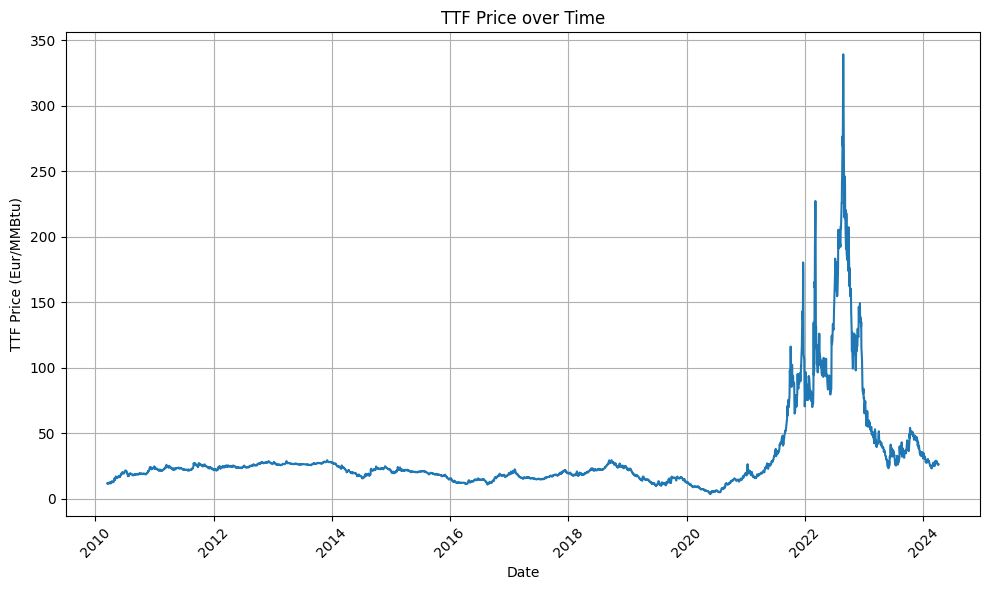

In [5]:
import matplotlib.pyplot as plt

# Plot
plt.figure(figsize=(10, 6))
plt.plot(ttf_price_adjusted['Date'], ttf_price_adjusted['Price'], linestyle='-')

# Set labels and title
plt.xlabel('Date')
plt.ylabel('TTF Price (Eur/MMBtu)')
plt.title('TTF Price over Time')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()

In [6]:
print("Summary Statistics of Price:")
print(ttf_price_adjusted['Price'].describe())

Summary Statistics of Price:
count    3603.000000
mean       31.177888
std        34.433882
min         3.509000
25%        16.770500
50%        21.890000
75%        26.600000
max       339.196000
Name: Price, dtype: float64


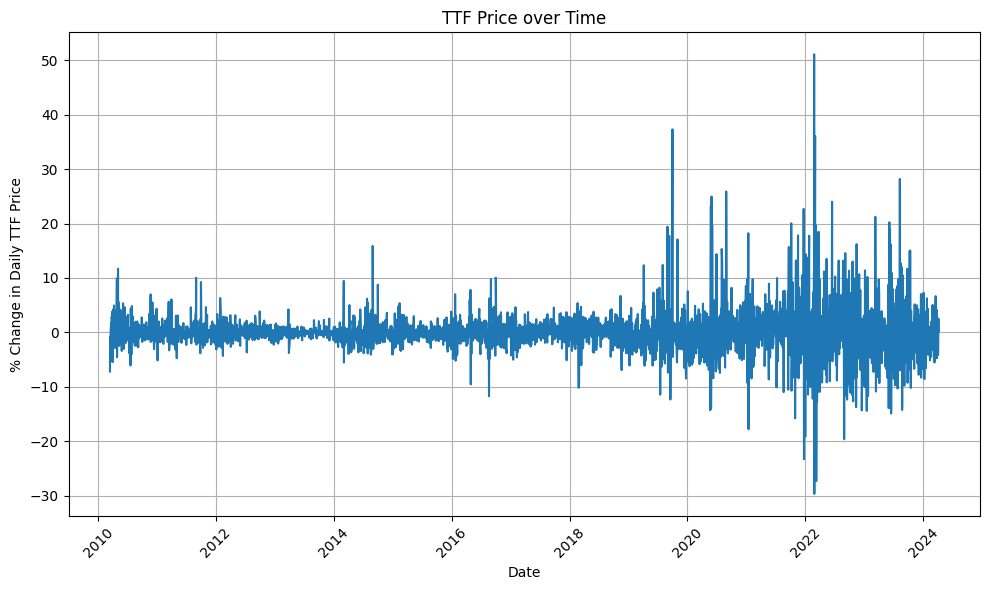

In [7]:
import matplotlib.pyplot as plt

# Plot
plt.figure(figsize=(10, 6))
plt.plot(ttf_price_adjusted['Date'], ttf_price_adjusted['Change %'].str.rstrip('%').astype(float), linestyle='-')

# Set labels and title
plt.xlabel('Date')
plt.ylabel('% Change in Daily TTF Price')
plt.title('TTF Price over Time')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()

In [8]:
print("Summary Statistics of Price:")
print(ttf_price_adjusted['Change %'].str.rstrip('%').astype(float).describe())

Summary Statistics of Price:
count    3603.000000
mean        0.098782
std         4.006414
min       -29.700000
25%        -1.360000
50%        -0.050000
75%         1.330000
max        51.100000
Name: Change %, dtype: float64


<ipython-input-9-9a0474fcdf55>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ttf_price_adjusted['Change %'] = ttf_price_adjusted['Change %'].astype(str).apply(lambda x: float(x.strip('%')))


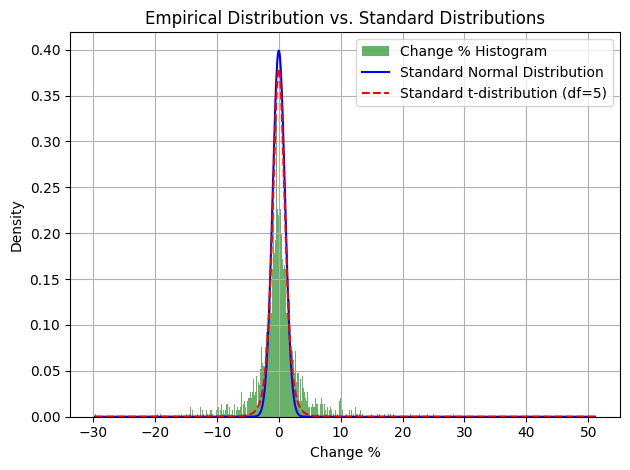

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm, t

# Convert 'Change %' column to string, remove '%' sign, and convert to numeric
ttf_price_adjusted['Change %'] = ttf_price_adjusted['Change %'].astype(str).apply(lambda x: float(x.strip('%')))

# Plot the histogram of 'Change %' column
plt.hist(ttf_price_adjusted['Change %'], bins=1000, density=True, alpha=0.6, color='g', label='Change % Histogram')

# Generate data points for the standard normal distribution
x = np.linspace(ttf_price_adjusted['Change %'].min(), ttf_price_adjusted['Change %'].max(), 1000)
standard_normal = norm.pdf(x, 0, 1)

# Generate data points for the standard t-distribution (with degrees of freedom = 30)
df = 5
standard_t = t.pdf(x, df)

# Plot the standard normal distribution
plt.plot(x, standard_normal, 'b-', label='Standard Normal Distribution')

# Plot the standard t-distribution
plt.plot(x, standard_t, 'r--', label=f'Standard t-distribution (df={df})')

# Set labels and title
plt.xlabel('Change %')
plt.ylabel('Density')
plt.title('Empirical Distribution vs. Standard Distributions')
plt.legend()

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()


<ipython-input-10-8412be5e6780>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ttf_price_adjusted['Change %'] = ttf_price_adjusted['Change %'].astype(str).apply(lambda x: float(x.strip('%')))


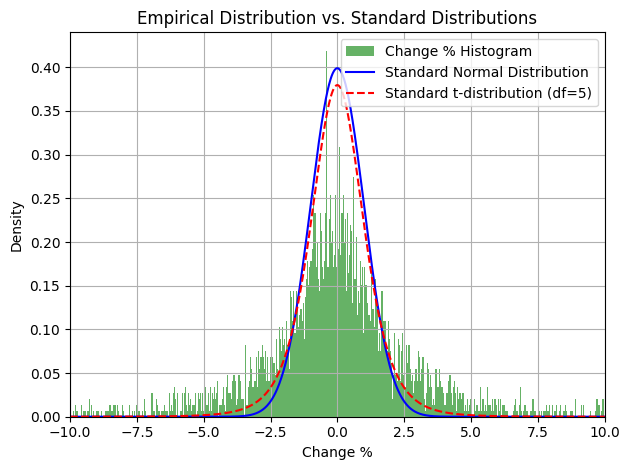

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm, t

# Convert 'Change %' column to string, remove '%' sign, and convert to numeric
ttf_price_adjusted['Change %'] = ttf_price_adjusted['Change %'].astype(str).apply(lambda x: float(x.strip('%')))

# Plot the histogram of 'Change %' column
plt.hist(ttf_price_adjusted['Change %'], bins=2000, density=True, alpha=0.6, color='g', label='Change % Histogram')

# Generate data points for the standard normal distribution within the range [-10, 10]
x_normal = np.linspace(-10, 10, 1000)
standard_normal = norm.pdf(x_normal, 0, 1)

# Plot the standard normal distribution
plt.plot(x_normal, standard_normal, 'b-', label='Standard Normal Distribution')

# Generate data points for the standard t-distribution (with degrees of freedom = 5) within the range [-10, 10]
standard_t = t.pdf(x_normal, 5)

# Plot the standard t-distribution
plt.plot(x_normal, standard_t, 'r--', label='Standard t-distribution (df=5)')

# Set x-axis limit
plt.xlim(-10, 10)

# Set labels and title
plt.xlabel('Change %')
plt.ylabel('Density')
plt.title('Empirical Distribution vs. Standard Distributions')
plt.legend()

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()


<br><br>
**VARIABLE 2: Natural Gas Storage in Europe**

In [11]:
import pandas as pd

europegasstorage_url = 'https://raw.githubusercontent.com/yellowstickypine/WQU-690-Capstone-24-03/main/GasStorage_raw.csv'
europegasstorage_github_raw = pd.read_csv(europegasstorage_url, delimiter=';')

print(europegasstorage_github_raw)

     Status Gas Day Start  Gas in storage (TWh)  Full (%)  Trend (%)  \
0         E    2024-04-06              676.4762     59.90       0.24   
1         E    2024-04-05              673.7138     59.66       0.16   
2         E    2024-04-04              671.9065     59.49       0.04   
3         C    2024-04-03              671.4747     59.46       0.05   
4         C    2024-04-02              670.8705     59.42       0.14   
...     ...           ...                   ...       ...        ...   
4840      C    2011-01-05              428.0276     69.32      -0.58   
4841      C    2011-01-04              431.5952     69.89      -0.60   
4842      C    2011-01-03              435.3212     70.50      -0.51   
4843      C    2011-01-02              438.4398     71.00      -0.32   
4844      C    2011-01-01              440.3870     71.32       0.00   

      Injection (GWh/d)  Withdrawal (GWh/d)  Technical Capacity (TWh)  \
0               2961.49               218.6                 11

In [12]:
# Rename 'Gas Day Start' column to 'Date'
europegasstorage_github_raw.rename(columns={'Gas Day Start': 'Date'}, inplace=True)

# Convert 'Date' column to datetime format
europegasstorage_github_raw['Date'] = pd.to_datetime(europegasstorage_github_raw['Date'], format='%Y-%m-%d')

# Sort the DataFrame by 'Date' column in ascending order
europegasstorage_github_raw.sort_values(by='Date', inplace=True)

# Reset index after sorting
europegasstorage_github_raw.reset_index(drop=True, inplace=True)

print(europegasstorage_github_raw)

     Status       Date  Gas in storage (TWh)  Full (%)  Trend (%)  \
0         C 2011-01-01              440.3870     71.32       0.00   
1         C 2011-01-02              438.4398     71.00      -0.32   
2         C 2011-01-03              435.3212     70.50      -0.51   
3         C 2011-01-04              431.5952     69.89      -0.60   
4         C 2011-01-05              428.0276     69.32      -0.58   
...     ...        ...                   ...       ...        ...   
4840      C 2024-04-02              670.8705     59.42       0.14   
4841      C 2024-04-03              671.4747     59.46       0.05   
4842      E 2024-04-04              671.9065     59.49       0.04   
4843      E 2024-04-05              673.7138     59.66       0.16   
4844      E 2024-04-06              676.4762     59.90       0.24   

      Injection (GWh/d)  Withdrawal (GWh/d)  Technical Capacity (TWh)  \
0                147.02              1536.0                  617.5104   
1                 84.05  

In [13]:
# Adjust DataFrame to include only 'Date', and necessary columns
europegasstorage_adjusted = europegasstorage_github_raw[['Date', 'Gas in storage (TWh)', 'Full (%)', 'Trend (%)']]

europegasstorage_adjusted = europegasstorage_adjusted.rename(columns={'Gas in storage (TWh)': 'Gas Inventory TWh',
                                                               'Full (%)': 'Gas Inventory Full %',
                                                               'Trend (%)': 'Gas Inventory Trend %'})

# Print the adjusted DataFrame
print(europegasstorage_adjusted)

           Date  Gas Inventory TWh  Gas Inventory Full %  \
0    2011-01-01           440.3870                 71.32   
1    2011-01-02           438.4398                 71.00   
2    2011-01-03           435.3212                 70.50   
3    2011-01-04           431.5952                 69.89   
4    2011-01-05           428.0276                 69.32   
...         ...                ...                   ...   
4840 2024-04-02           670.8705                 59.42   
4841 2024-04-03           671.4747                 59.46   
4842 2024-04-04           671.9065                 59.49   
4843 2024-04-05           673.7138                 59.66   
4844 2024-04-06           676.4762                 59.90   

      Gas Inventory Trend %  
0                      0.00  
1                     -0.32  
2                     -0.51  
3                     -0.60  
4                     -0.58  
...                     ...  
4840                   0.14  
4841                   0.05  
4842     

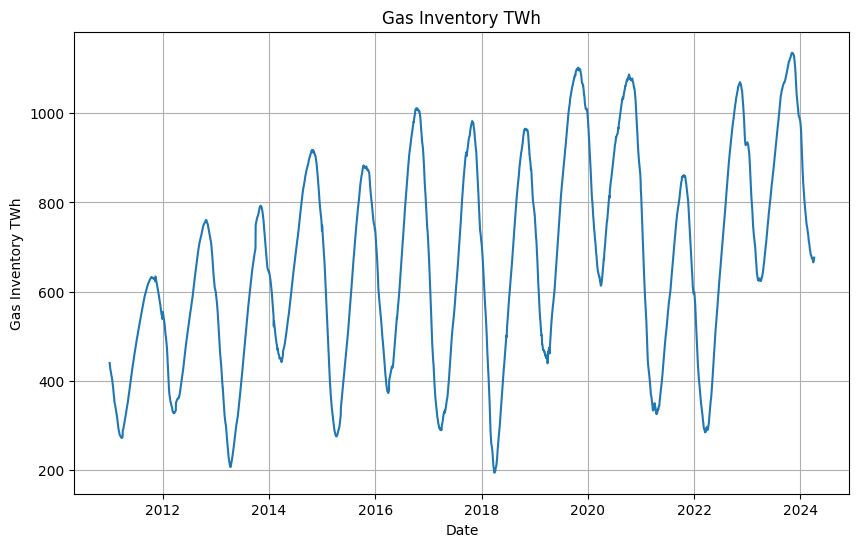

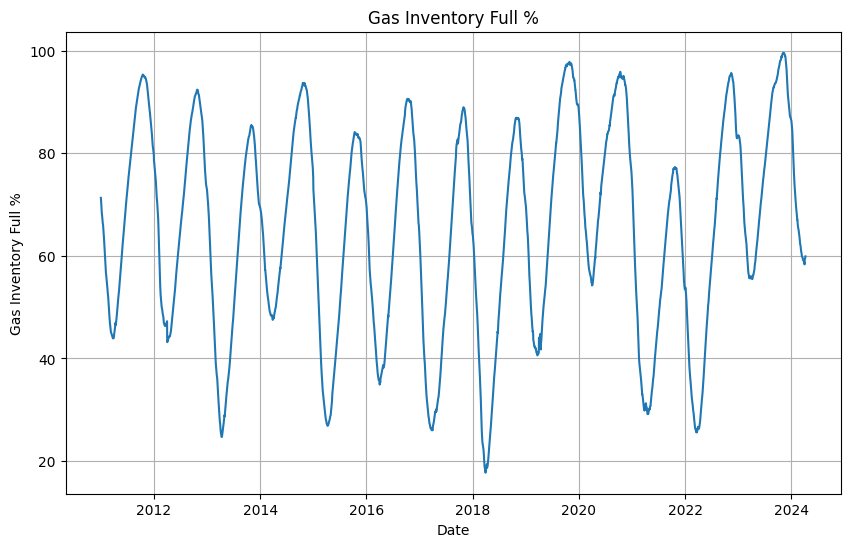

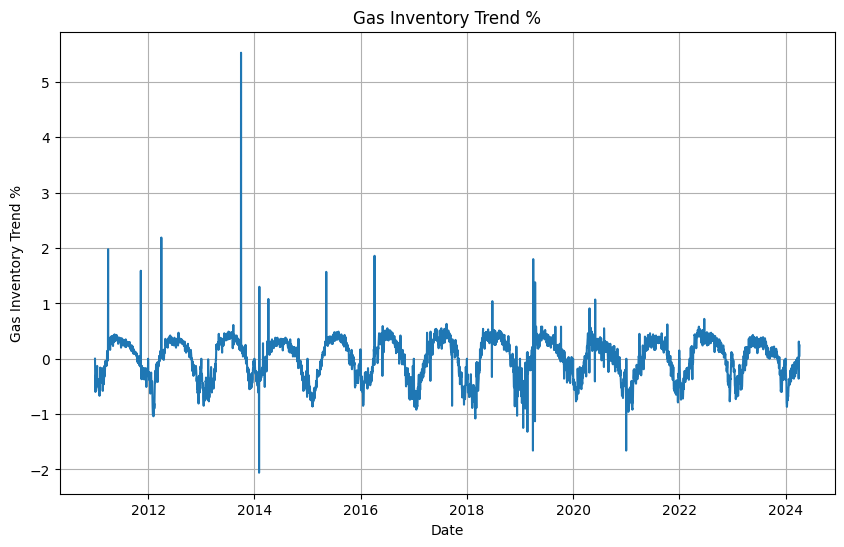

In [14]:
# Plotting each column separately
columns_to_plot = ["Gas Inventory TWh", "Gas Inventory Full %", "Gas Inventory Trend %"]
for column in columns_to_plot:
    plt.figure(figsize=(10, 6))
    plt.plot(europegasstorage_adjusted['Date'], europegasstorage_adjusted[column])
    plt.title(column)
    plt.xlabel('Date')
    plt.ylabel(column)
    plt.grid(True)
    plt.show()

<br><br>
**VARIABLE 3: LNG Storage in Europe**

In [15]:
import pandas as pd

lngstorage_url = 'https://raw.githubusercontent.com/yellowstickypine/WQU-690-Capstone-24-03/main/LNGStorage_raw.csv'
lngstorage_github_raw = pd.read_csv(lngstorage_url, delimiter=';')

print(lngstorage_github_raw)

     Status Gas Day Start  LNG Inventory (10³ ㎥ LNG)  LNG Inventory (~GWh)  \
0         E    2024-04-21                    5188.14              35040.03   
1         E    2024-04-20                    5029.65              33928.50   
2         E    2024-04-19                    4948.85              33334.87   
3         E    2024-04-18                    4802.75              32320.71   
4         E    2024-04-17                    4885.10              32819.26   
...     ...           ...                        ...                   ...   
4490      C    2012-01-05                    3458.69                603.64   
4491      C    2012-01-04                    3496.63                548.81   
4492      C    2012-01-03                    3797.68                631.24   
4493      C    2012-01-02                    4038.22                702.77   
4494      C    2012-01-01                    3914.31                701.63   

      Technical Capacity / DTMI (10³ ㎥ LNG)  Technical Capacity

In [16]:
# Rename 'Gas Day Start' column to 'Date'
lngstorage_github_raw.rename(columns={'Gas Day Start': 'Date'}, inplace=True)

# Convert 'Date' column to datetime format
lngstorage_github_raw['Date'] = pd.to_datetime(lngstorage_github_raw['Date'], format='%Y-%m-%d')

# Sort the DataFrame by 'Date' column in ascending order
lngstorage_github_raw.sort_values(by='Date', inplace=True)

# Reset index after sorting
lngstorage_github_raw.reset_index(drop=True, inplace=True)

print(lngstorage_github_raw)

     Status       Date  LNG Inventory (10³ ㎥ LNG)  LNG Inventory (~GWh)  \
0         C 2012-01-01                    3914.31                701.63   
1         C 2012-01-02                    4038.22                702.77   
2         C 2012-01-03                    3797.68                631.24   
3         C 2012-01-04                    3496.63                548.81   
4         C 2012-01-05                    3458.69                603.64   
...     ...        ...                        ...                   ...   
4490      E 2024-04-17                    4885.10              32819.26   
4491      E 2024-04-18                    4802.75              32320.71   
4492      E 2024-04-19                    4948.85              33334.87   
4493      E 2024-04-20                    5029.65              33928.50   
4494      E 2024-04-21                    5188.14              35040.03   

      Technical Capacity / DTMI (10³ ㎥ LNG)  Technical Capacity / DTMI (~GWh)  \
0                 

In [17]:
# Adjust DataFrame to include only 'Date', and necessary columns
lngstorage_adjusted = lngstorage_github_raw[['Date', 'LNG Inventory (10³ ㎥ LNG)']]

lngstorage_adjusted = lngstorage_adjusted.rename(columns={'LNG Inventory (10³ ㎥ LNG)': 'LNG Inventory m3'})

# Print the adjusted DataFrame
print(lngstorage_adjusted)

           Date  LNG Inventory m3
0    2012-01-01           3914.31
1    2012-01-02           4038.22
2    2012-01-03           3797.68
3    2012-01-04           3496.63
4    2012-01-05           3458.69
...         ...               ...
4490 2024-04-17           4885.10
4491 2024-04-18           4802.75
4492 2024-04-19           4948.85
4493 2024-04-20           5029.65
4494 2024-04-21           5188.14

[4495 rows x 2 columns]


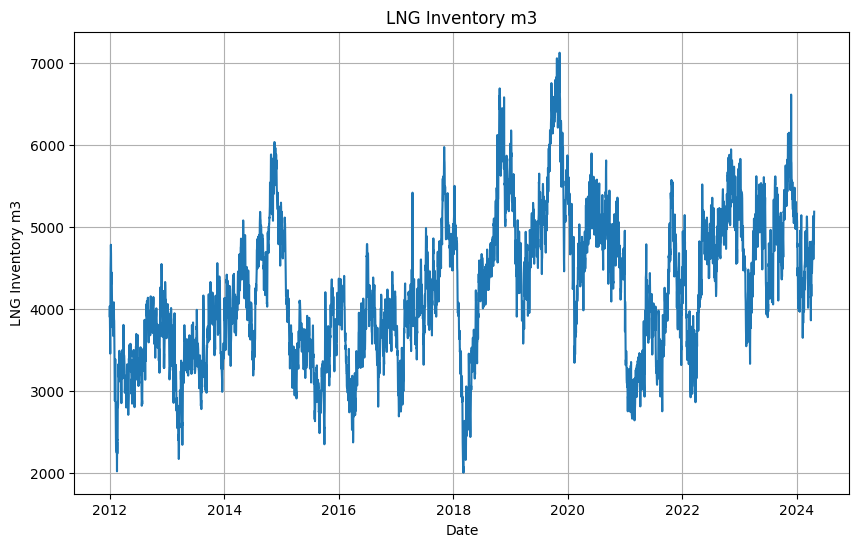

In [18]:
# Plotting each column separately
columns_to_plot = ["LNG Inventory m3"]
for column in columns_to_plot:
    plt.figure(figsize=(10, 6))
    plt.plot(lngstorage_adjusted['Date'], lngstorage_adjusted[column])
    plt.title(column)
    plt.xlabel('Date')
    plt.ylabel(column)
    plt.grid(True)
    plt.show()

<br><br>
**VARIABLE 4: Interest Rates in Europe (ECBDFR)**

In [19]:
from fredapi import Fred

# Replace 'your_api_key' with your actual FRED API key
fred = Fred(api_key='0ecabe2a48130d6891c15fbc1b599d1c')

# Example: Downloading ECBDFR data
ECBDFR_raw = fred.get_series('ECBDFR', download=True)

ECBDFR_adjusted = ECBDFR_raw.to_frame(name='ECBDFR')
ECBDFR_adjusted.index.name = 'Date'
ECBDFR_adjusted = ECBDFR_adjusted.reset_index()
ECBDFR_adjusted['Date'] = pd.to_datetime(ECBDFR_adjusted['Date'], format='%Y-%m-%d')

print(ECBDFR_adjusted)

           Date  ECBDFR
0    1999-01-01    2.00
1    1999-01-02    2.00
2    1999-01-03    2.00
3    1999-01-04    2.75
4    1999-01-05    2.75
...         ...     ...
9243 2024-04-22    4.00
9244 2024-04-23    4.00
9245 2024-04-24    4.00
9246 2024-04-25    4.00
9247 2024-04-26    4.00

[9248 rows x 2 columns]


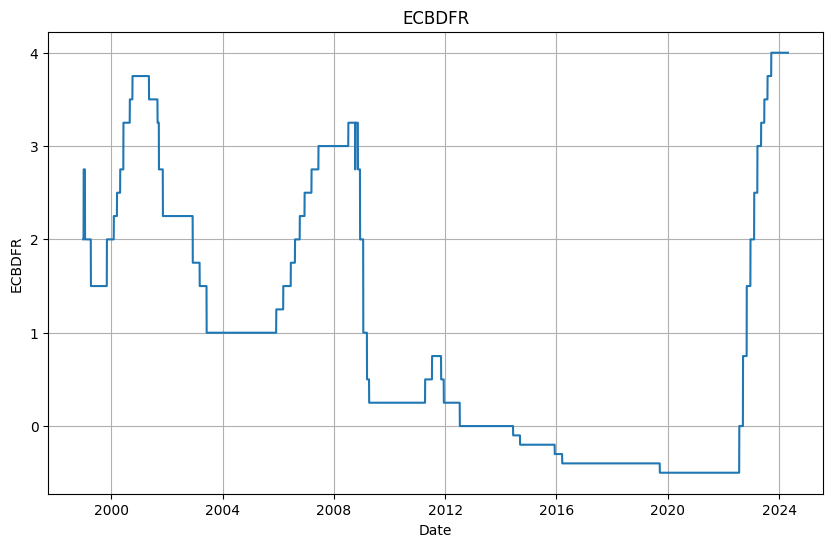

In [20]:
# Plotting each column separately
columns_to_plot = ["ECBDFR"]
for column in columns_to_plot:
    plt.figure(figsize=(10, 6))
    plt.plot(ECBDFR_adjusted['Date'], ECBDFR_adjusted[column])
    plt.title(column)
    plt.xlabel('Date')
    plt.ylabel(column)
    plt.grid(True)
    plt.show()

<br><br>
**VARIABLE 5: EUR-USD Exchange Rate (DEXUSEU)**

In [21]:
from fredapi import Fred

# Replace 'your_api_key' with your actual FRED API key
fred = Fred(api_key='0ecabe2a48130d6891c15fbc1b599d1c')

# Example: Downloading ECBDFR data
DEXUSEU_raw = fred.get_series('DEXUSEU', download=True)

DEXUSEU_adjusted = DEXUSEU_raw.to_frame(name='DEXUSEU')
DEXUSEU_adjusted.index.name = 'Date'
DEXUSEU_adjusted = DEXUSEU_adjusted.reset_index()
DEXUSEU_adjusted['Date'] = pd.to_datetime(DEXUSEU_adjusted['Date'], format='%Y-%m-%d')

print(DEXUSEU_adjusted)

           Date  DEXUSEU
0    1999-01-04   1.1812
1    1999-01-05   1.1760
2    1999-01-06   1.1636
3    1999-01-07   1.1672
4    1999-01-08   1.1554
...         ...      ...
6595 2024-04-15   1.0644
6596 2024-04-16   1.0628
6597 2024-04-17   1.0644
6598 2024-04-18   1.0660
6599 2024-04-19   1.0655

[6600 rows x 2 columns]


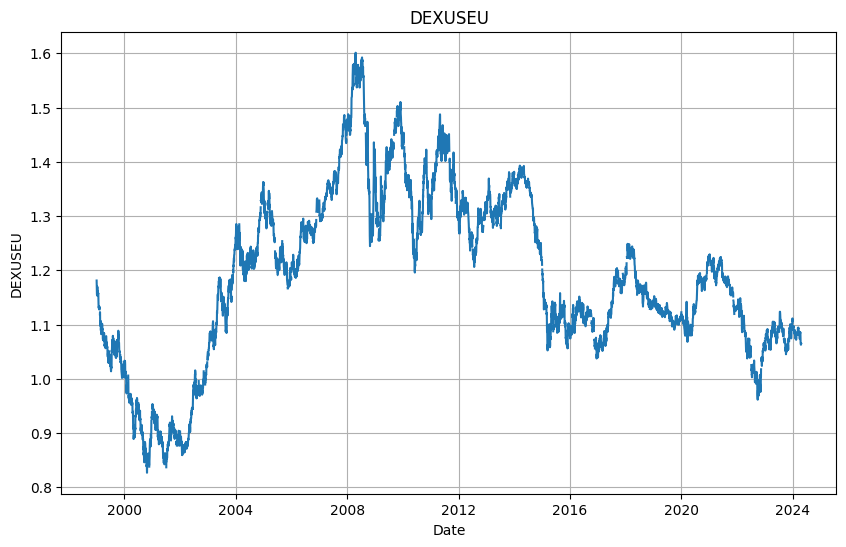

In [22]:
# Plotting each column separately
columns_to_plot = ["DEXUSEU"]
for column in columns_to_plot:
    plt.figure(figsize=(10, 6))
    plt.plot(DEXUSEU_adjusted['Date'], DEXUSEU_adjusted[column])
    plt.title(column)
    plt.xlabel('Date')
    plt.ylabel(column)
    plt.grid(True)
    plt.show()

<br><br>
**VARIABLE 6: Competing Fuel - Crude Oil Prices (DCOILBRENTEU)**

In [23]:
from fredapi import Fred

# Replace 'your_api_key' with your actual FRED API key
fred = Fred(api_key='0ecabe2a48130d6891c15fbc1b599d1c')

# Example: Downloading ECBDFR data
DCOILBRENTEU_raw = fred.get_series('DCOILBRENTEU', download=True)

DCOILBRENTEU_adjusted = DCOILBRENTEU_raw.to_frame(name='DCOILBRENTEU')
DCOILBRENTEU_adjusted.index.name = 'Date'
DCOILBRENTEU_adjusted = DCOILBRENTEU_adjusted.reset_index()
DCOILBRENTEU_adjusted['Date'] = pd.to_datetime(DCOILBRENTEU_adjusted['Date'], format='%Y-%m-%d')

print(DCOILBRENTEU_adjusted)

           Date  DCOILBRENTEU
0    1987-05-20         18.63
1    1987-05-21         18.45
2    1987-05-22         18.55
3    1987-05-25         18.60
4    1987-05-26         18.63
...         ...           ...
9629 2024-04-16         91.29
9630 2024-04-17         89.54
9631 2024-04-18         88.34
9632 2024-04-19         87.96
9633 2024-04-22         87.30

[9634 rows x 2 columns]


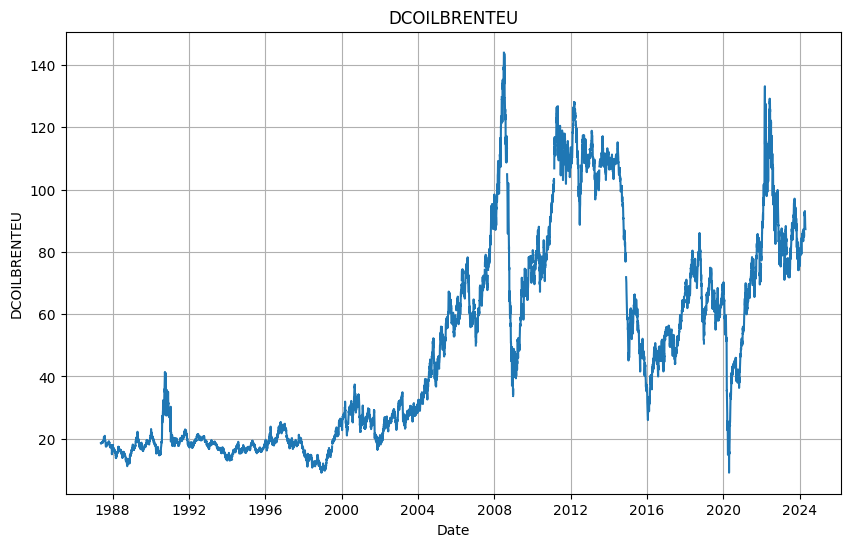

In [24]:
# Plotting each column separately
columns_to_plot = ["DCOILBRENTEU"]
for column in columns_to_plot:
    plt.figure(figsize=(10, 6))
    plt.plot(DCOILBRENTEU_adjusted['Date'], DCOILBRENTEU_adjusted[column])
    plt.title(column)
    plt.xlabel('Date')
    plt.ylabel(column)
    plt.grid(True)
    plt.show()

<br><br>
**VARIABLE 7: Competing Fuel - Heating Oil Prices (DHOILNYH)**

In [25]:
from fredapi import Fred

# Replace 'your_api_key' with your actual FRED API key
fred = Fred(api_key='0ecabe2a48130d6891c15fbc1b599d1c')

# Example: Downloading ECBDFR data
DHOILNYH_raw = fred.get_series('DHOILNYH', download=True)

DHOILNYH_adjusted = DHOILNYH_raw.to_frame(name='DHOILNYH')
DHOILNYH_adjusted.index.name = 'Date'
DHOILNYH_adjusted = DHOILNYH_adjusted.reset_index()
DHOILNYH_adjusted['Date'] = pd.to_datetime(DHOILNYH_adjusted['Date'], format='%Y-%m-%d')

print(DHOILNYH_adjusted)

           Date  DHOILNYH
0    1986-06-02     0.402
1    1986-06-03     0.393
2    1986-06-04     0.378
3    1986-06-05     0.390
4    1986-06-06     0.385
...         ...       ...
9881 2024-04-16     2.554
9882 2024-04-17     2.479
9883 2024-04-18     2.428
9884 2024-04-19     2.444
9885 2024-04-22     2.465

[9886 rows x 2 columns]


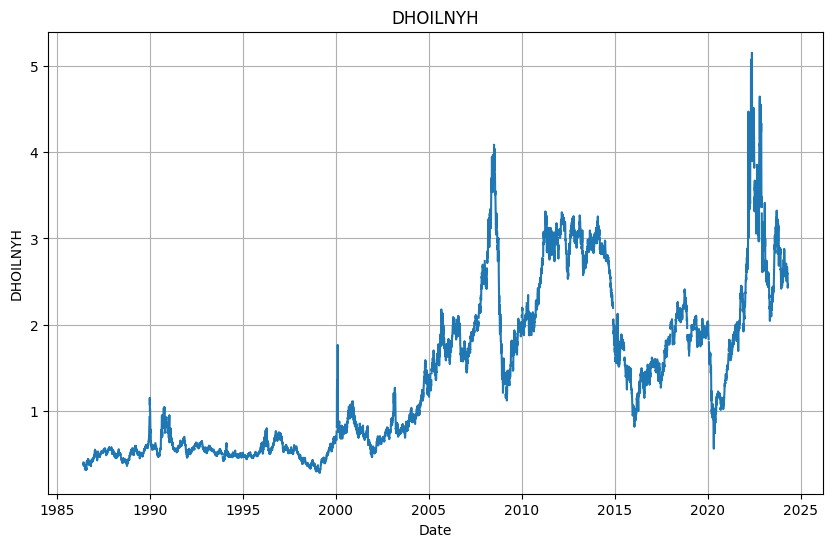

In [26]:
# Plotting each column separately
columns_to_plot = ["DHOILNYH"]
for column in columns_to_plot:
    plt.figure(figsize=(10, 6))
    plt.plot(DHOILNYH_adjusted['Date'], DHOILNYH_adjusted[column])
    plt.title(column)
    plt.xlabel('Date')
    plt.ylabel(column)
    plt.grid(True)
    plt.show()

<br><br>
**VARIABLE 8 - Competing Fuel - USA Natural Gas Prices (DHHNGSP)**

In [27]:
from fredapi import Fred

# Replace 'your_api_key' with your actual FRED API key
fred = Fred(api_key='0ecabe2a48130d6891c15fbc1b599d1c')

# Example: Downloading ECBDFR data
DHHNGSP_raw = fred.get_series('DHHNGSP', download=True)

DHHNGSP_adjusted = DHHNGSP_raw.to_frame(name='DHHNGSP')
DHHNGSP_adjusted.index.name = 'Date'
DHHNGSP_adjusted = DHHNGSP_adjusted.reset_index()
DHHNGSP_adjusted['Date'] = pd.to_datetime(DHHNGSP_adjusted['Date'], format='%Y-%m-%d')

print(DHHNGSP_adjusted)

           Date  DHHNGSP
0    1997-01-07     3.82
1    1997-01-08     3.80
2    1997-01-09     3.61
3    1997-01-10     3.92
4    1997-01-13     4.00
...         ...      ...
7121 2024-04-17     1.50
7122 2024-04-18     1.59
7123 2024-04-19     1.43
7124 2024-04-22     1.64
7125 2024-04-23     1.59

[7126 rows x 2 columns]


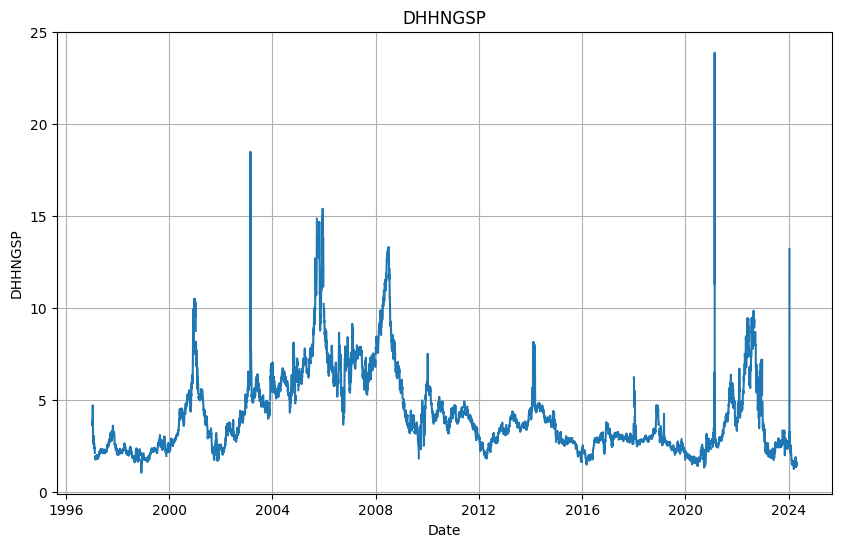

In [28]:
# Plotting each column separately
columns_to_plot = ["DHHNGSP"]
for column in columns_to_plot:
    plt.figure(figsize=(10, 6))
    plt.plot(DHHNGSP_adjusted['Date'], DHHNGSP_adjusted[column])
    plt.title(column)
    plt.xlabel('Date')
    plt.ylabel(column)
    plt.grid(True)
    plt.show()

<br><br>
**VARIABLE 9-11: WEATHER CONDITIONS IN BERLIN, GERMANY (Temperature, Sunlight, Precipitation)**

In [29]:
%%capture

!pip install openmeteo-requests
!pip install requests-cache retry-requests numpy pandas

In [30]:
import openmeteo_requests

import requests_cache
import pandas as pd
from retry_requests import retry

# Setup the Open-Meteo API client with cache and retry on error
cache_session = requests_cache.CachedSession('.cache', expire_after = -1)
retry_session = retry(cache_session, retries = 5, backoff_factor = 0.2)
openmeteo = openmeteo_requests.Client(session = retry_session)

# Make sure all required weather variables are listed here
# The order of variables in hourly or daily is important to assign them correctly below
url = "https://archive-api.open-meteo.com/v1/archive"
params = {
	"latitude": 51.5,
	"longitude": 10.5,
	"start_date": "2011-01-01",
	"end_date": "2024-04-16",
	"daily": ["temperature_2m_mean", "apparent_temperature_mean", "daylight_duration", "sunshine_duration", "precipitation_sum"]
}
responses = openmeteo.weather_api(url, params=params)

# Process first location. Add a for-loop for multiple locations or weather models
response = responses[0]
print(f"Coordinates {response.Latitude()}°N {response.Longitude()}°E")
print(f"Elevation {response.Elevation()} m asl")
print(f"Timezone {response.Timezone()} {response.TimezoneAbbreviation()}")
print(f"Timezone difference to GMT+0 {response.UtcOffsetSeconds()} s")

# Process daily data. The order of variables needs to be the same as requested.
daily = response.Daily()
daily_temperature_2m_mean = daily.Variables(0).ValuesAsNumpy()
daily_apparent_temperature_mean = daily.Variables(1).ValuesAsNumpy()
daily_daylight_duration = daily.Variables(2).ValuesAsNumpy()
daily_sunshine_duration = daily.Variables(3).ValuesAsNumpy()
daily_precipitation_sum = daily.Variables(4).ValuesAsNumpy()

daily_data = {"date": pd.date_range(
	start = pd.to_datetime(daily.Time(), unit = "s", utc = True),
	end = pd.to_datetime(daily.TimeEnd(), unit = "s", utc = True),
	freq = pd.Timedelta(seconds = daily.Interval()),
	inclusive = "left"
)}
daily_data["temperature_2m_mean"] = daily_temperature_2m_mean
daily_data["apparent_temperature_mean"] = daily_apparent_temperature_mean
daily_data["daylight_duration"] = daily_daylight_duration
daily_data["sunshine_duration"] = daily_sunshine_duration
daily_data["precipitation_sum"] = daily_precipitation_sum

berlin_weather_raw = pd.DataFrame(data = daily_data)
print(berlin_weather_raw)

Coordinates 51.49384689331055°N 10.434782981872559°E
Elevation 309.0 m asl
Timezone None None
Timezone difference to GMT+0 0 s
                          date  temperature_2m_mean  \
0    2011-01-01 00:00:00+00:00            -0.065500   
1    2011-01-02 00:00:00+00:00            -1.313417   
2    2011-01-03 00:00:00+00:00            -2.484250   
3    2011-01-04 00:00:00+00:00            -3.419667   
4    2011-01-05 00:00:00+00:00            -8.392585   
...                        ...                  ...   
4850 2024-04-12 00:00:00+00:00            13.386168   
4851 2024-04-13 00:00:00+00:00            15.948667   
4852 2024-04-14 00:00:00+00:00            13.042418   
4853 2024-04-15 00:00:00+00:00             8.738250   
4854 2024-04-16 00:00:00+00:00             5.129917   

      apparent_temperature_mean  daylight_duration  sunshine_duration  \
0                     -5.023904       28535.175781           0.000000   
1                     -6.104208       28604.351562       16652.335

In [31]:
# Rename 'Gas Day Start' column to 'Date'
berlin_weather_raw.rename(columns={'date': 'Date'}, inplace=True)

# Convert 'Date' column to datetime format
berlin_weather_raw['Date'] = pd.to_datetime(berlin_weather_raw['Date']).dt.date
berlin_weather_raw['Date'] = pd.to_datetime(berlin_weather_raw['Date'], format='%Y-%m-%d')

# Sort the DataFrame by 'Date' column in ascending order
berlin_weather_raw.sort_values(by='Date', inplace=True)

# Reset index after sorting
berlin_weather_raw.reset_index(drop=True, inplace=True)

print(berlin_weather_raw)

           Date  temperature_2m_mean  apparent_temperature_mean  \
0    2011-01-01            -0.065500                  -5.023904   
1    2011-01-02            -1.313417                  -6.104208   
2    2011-01-03            -2.484250                  -6.710105   
3    2011-01-04            -3.419667                  -7.497032   
4    2011-01-05            -8.392585                 -13.090427   
...         ...                  ...                        ...   
4850 2024-04-12            13.386168                  11.578322   
4851 2024-04-13            15.948667                  14.054107   
4852 2024-04-14            13.042418                   9.869430   
4853 2024-04-15             8.738250                   4.872726   
4854 2024-04-16             5.129917                   0.662381   

      daylight_duration  sunshine_duration  precipitation_sum  
0          28535.175781           0.000000                1.5  
1          28604.351562       16652.335938                0.3  
2  

In [32]:
# Adjust DataFrame to include only 'Date', and necessary columns
berlin_weather_adjusted = berlin_weather_raw[['Date', 'apparent_temperature_mean', 'sunshine_duration', 'precipitation_sum']]

berlin_weather_adjusted = berlin_weather_adjusted.rename(columns={'apparent_temperature_mean': 'Berlin Temperature',
                                                                  'sunshine_duration': 'Berlin Sunshine',
                                                                  'precipitation_sum': 'Berlin Rainfall'})

# Print the adjusted DataFrame
print(berlin_weather_adjusted)

           Date  Berlin Temperature  Berlin Sunshine  Berlin Rainfall
0    2011-01-01           -5.023904         0.000000              1.5
1    2011-01-02           -6.104208     16652.335938              0.3
2    2011-01-03           -6.710105     17846.476562              0.0
3    2011-01-04           -7.497032      6506.347168              0.0
4    2011-01-05          -13.090427     23743.294922              0.0
...         ...                 ...              ...              ...
4850 2024-04-12           11.578322     35586.542969              0.0
4851 2024-04-13           14.054107     43746.730469              0.0
4852 2024-04-14            9.869430     35135.953125              0.1
4853 2024-04-15            4.872726     31620.558594              6.3
4854 2024-04-16            0.662381     21901.832031              3.0

[4855 rows x 4 columns]


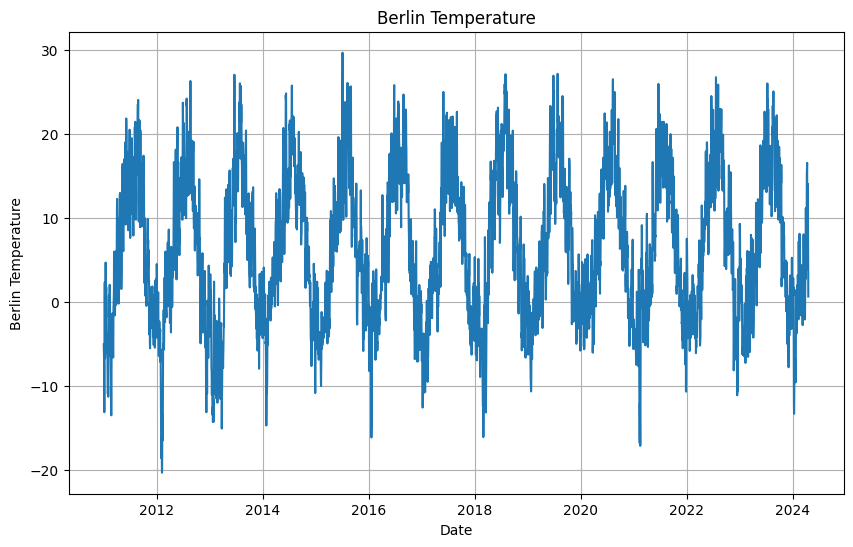

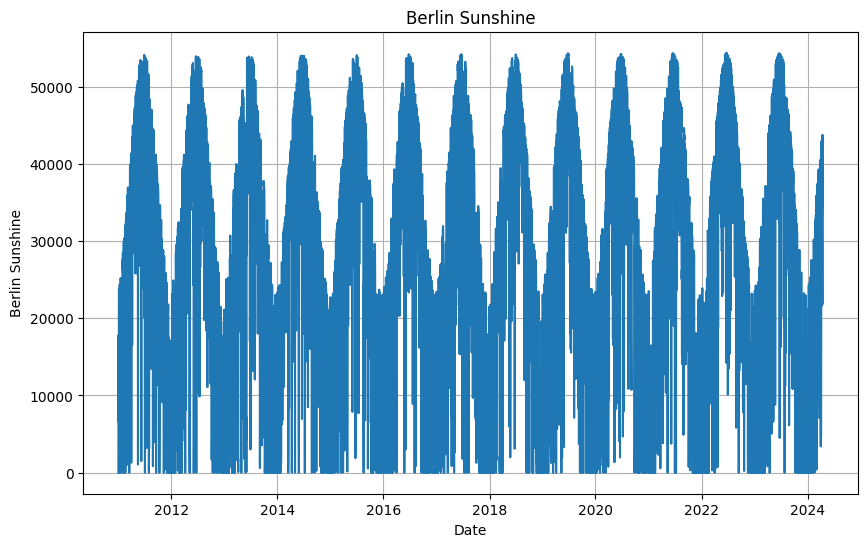

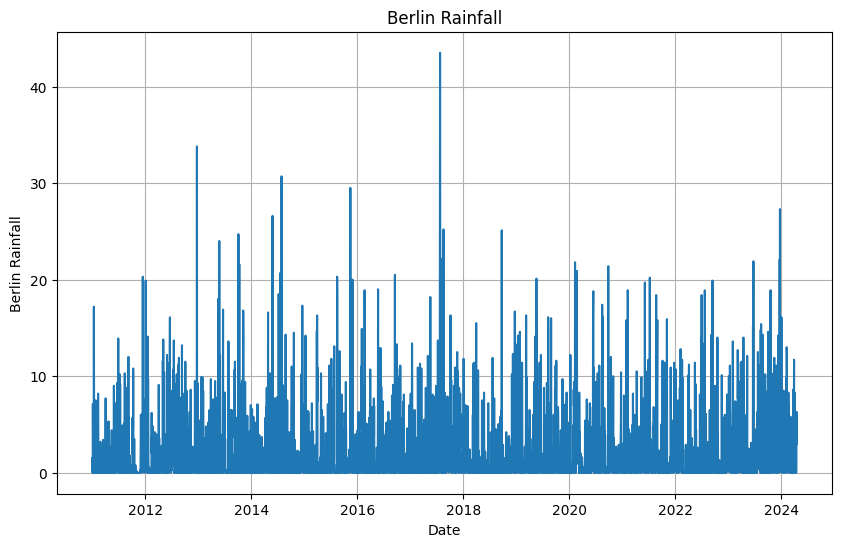

In [33]:
# Plotting each column separately
columns_to_plot = ["Berlin Temperature", 'Berlin Sunshine', 'Berlin Rainfall']
for column in columns_to_plot:
    plt.figure(figsize=(10, 6))
    plt.plot(berlin_weather_adjusted['Date'], berlin_weather_adjusted[column])
    plt.title(column)
    plt.xlabel('Date')
    plt.ylabel(column)
    plt.grid(True)
    plt.show()

<br><br>
**VARIABLE 12-14: WEATHER CONDITIONS IN LONDON, UNITED KINGDOM (Temperature, Sunlight, Precipitation)**

In [34]:
import openmeteo_requests

import requests_cache
import pandas as pd
from retry_requests import retry

# Setup the Open-Meteo API client with cache and retry on error
cache_session = requests_cache.CachedSession('.cache', expire_after = -1)
retry_session = retry(cache_session, retries = 5, backoff_factor = 0.2)
openmeteo = openmeteo_requests.Client(session = retry_session)

# Make sure all required weather variables are listed here
# The order of variables in hourly or daily is important to assign them correctly below
url = "https://archive-api.open-meteo.com/v1/archive"
params = {
	"latitude": 51.4,
	"longitude": -0.1,
	"start_date": "2011-01-01",
	"end_date": "2024-04-16",
	"daily": ["temperature_2m_mean", "apparent_temperature_mean", "daylight_duration", "sunshine_duration", "precipitation_sum"]
}
responses = openmeteo.weather_api(url, params=params)

# Process first location. Add a for-loop for multiple locations or weather models
response = responses[0]
print(f"Coordinates {response.Latitude()}°N {response.Longitude()}°E")
print(f"Elevation {response.Elevation()} m asl")
print(f"Timezone {response.Timezone()} {response.TimezoneAbbreviation()}")
print(f"Timezone difference to GMT+0 {response.UtcOffsetSeconds()} s")

# Process daily data. The order of variables needs to be the same as requested.
daily = response.Daily()
daily_temperature_2m_mean = daily.Variables(0).ValuesAsNumpy()
daily_apparent_temperature_mean = daily.Variables(1).ValuesAsNumpy()
daily_daylight_duration = daily.Variables(2).ValuesAsNumpy()
daily_sunshine_duration = daily.Variables(3).ValuesAsNumpy()
daily_precipitation_sum = daily.Variables(4).ValuesAsNumpy()

daily_data = {"date": pd.date_range(
	start = pd.to_datetime(daily.Time(), unit = "s", utc = True),
	end = pd.to_datetime(daily.TimeEnd(), unit = "s", utc = True),
	freq = pd.Timedelta(seconds = daily.Interval()),
	inclusive = "left"
)}
daily_data["temperature_2m_mean"] = daily_temperature_2m_mean
daily_data["apparent_temperature_mean"] = daily_apparent_temperature_mean
daily_data["daylight_duration"] = daily_daylight_duration
daily_data["sunshine_duration"] = daily_sunshine_duration
daily_data["precipitation_sum"] = daily_precipitation_sum

london_weather_raw = pd.DataFrame(data = daily_data)
print(london_weather_raw)

Coordinates 51.42354965209961°N -0.162750244140625°E
Elevation 55.0 m asl
Timezone None None
Timezone difference to GMT+0 0 s
                          date  temperature_2m_mean  \
0    2011-01-01 00:00:00+00:00             4.369667   
1    2011-01-02 00:00:00+00:00             0.665500   
2    2011-01-03 00:00:00+00:00            -0.203250   
3    2011-01-04 00:00:00+00:00             2.511333   
4    2011-01-05 00:00:00+00:00             5.007166   
...                        ...                  ...   
4850 2024-04-12 00:00:00+00:00            13.788918   
4851 2024-04-13 00:00:00+00:00            13.930584   
4852 2024-04-14 00:00:00+00:00            10.343083   
4853 2024-04-15 00:00:00+00:00             8.299334   
4854 2024-04-16 00:00:00+00:00             8.609750   

      apparent_temperature_mean  daylight_duration  sunshine_duration  \
0                      1.497479       28576.771484           0.000000   
1                     -2.767628       28645.707031       21939.8945

In [35]:
# Rename 'Gas Day Start' column to 'Date'
london_weather_raw.rename(columns={'date': 'Date'}, inplace=True)

# Convert 'Date' column to datetime format
london_weather_raw['Date'] = pd.to_datetime(london_weather_raw['Date']).dt.date
london_weather_raw['Date'] = pd.to_datetime(london_weather_raw['Date'], format='%Y-%m-%d')

# Sort the DataFrame by 'Date' column in ascending order
london_weather_raw.sort_values(by='Date', inplace=True)

# Reset index after sorting
london_weather_raw.reset_index(drop=True, inplace=True)

print(london_weather_raw)

           Date  temperature_2m_mean  apparent_temperature_mean  \
0    2011-01-01             4.369667                   1.497479   
1    2011-01-02             0.665500                  -2.767628   
2    2011-01-03            -0.203250                  -3.294170   
3    2011-01-04             2.511333                  -0.905201   
4    2011-01-05             5.007166                   0.615538   
...         ...                  ...                        ...   
4850 2024-04-12            13.788918                  10.847941   
4851 2024-04-13            13.930584                  11.302673   
4852 2024-04-14            10.343083                   7.168549   
4853 2024-04-15             8.299334                   2.374092   
4854 2024-04-16             8.609750                   4.196786   

      daylight_duration  sunshine_duration  precipitation_sum  
0          28576.771484           0.000000                0.5  
1          28645.707031       21939.894531                0.0  
2  

In [36]:
# Adjust DataFrame to include only 'Date', and necessary columns
london_weather_adjusted = london_weather_raw[['Date', 'apparent_temperature_mean', 'sunshine_duration', 'precipitation_sum']]

london_weather_adjusted = london_weather_adjusted.rename(columns={'apparent_temperature_mean': 'London Temperature',
                                                                  'sunshine_duration': 'London Sunshine',
                                                                  'precipitation_sum': 'London Rainfall'})

# Print the adjusted DataFrame
print(london_weather_adjusted)

           Date  London Temperature  London Sunshine  London Rainfall
0    2011-01-01            1.497479         0.000000              0.5
1    2011-01-02           -2.767628     21939.894531              0.0
2    2011-01-03           -3.294170     12458.488281              0.0
3    2011-01-04           -0.905201      7734.181641              0.0
4    2011-01-05            0.615538     16750.812500              2.2
...         ...                 ...              ...              ...
4850 2024-04-12           10.847941     40560.019531              0.0
4851 2024-04-13           11.302673     43200.000000              0.0
4852 2024-04-14            7.168549     22240.263672              0.0
4853 2024-04-15            2.374092     28800.000000              4.5
4854 2024-04-16            4.196786     44188.292969              4.1

[4855 rows x 4 columns]


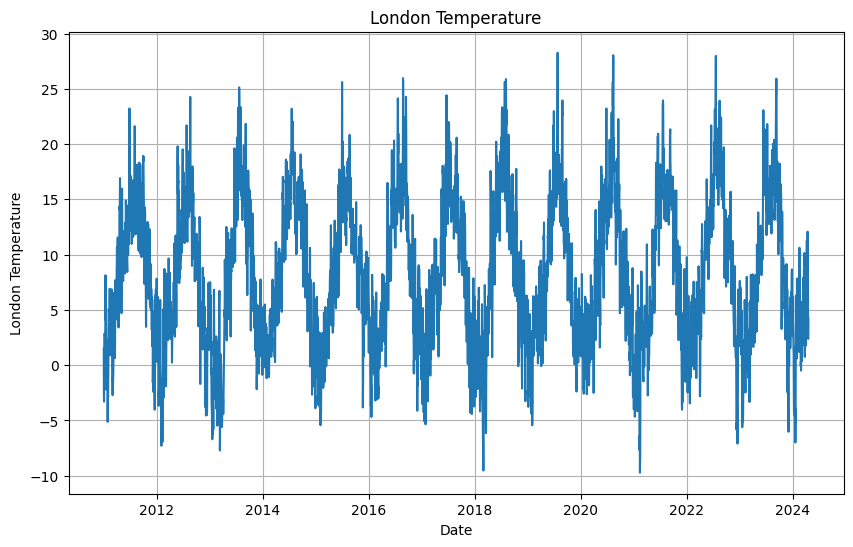

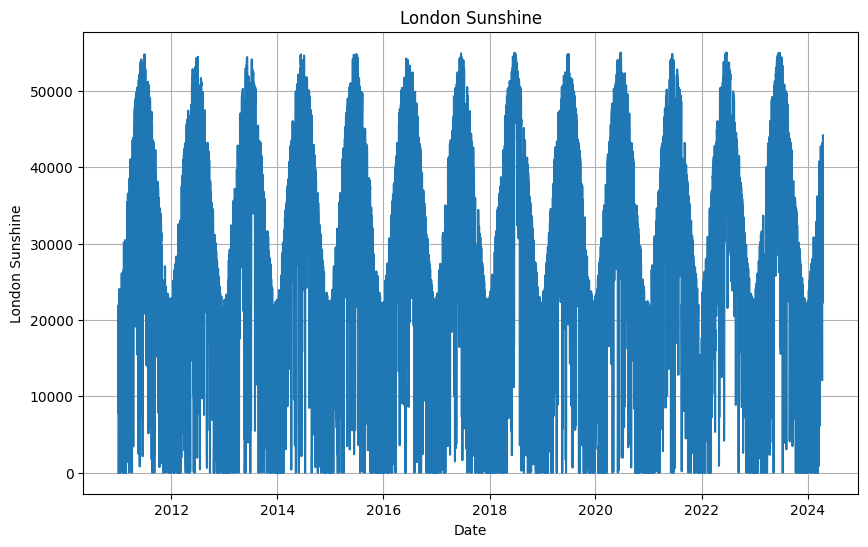

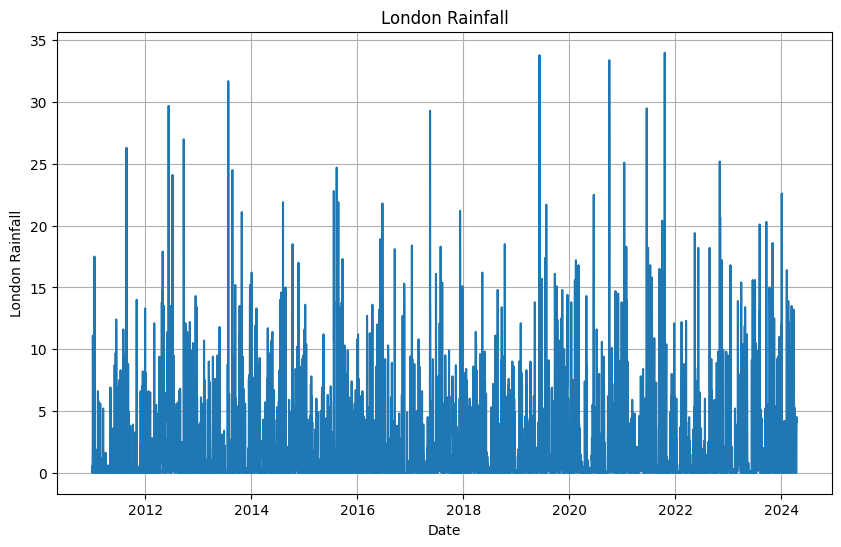

In [37]:
# Plotting each column separately
columns_to_plot = ["London Temperature", 'London Sunshine', 'London Rainfall']
for column in columns_to_plot:
    plt.figure(figsize=(10, 6))
    plt.plot(london_weather_adjusted['Date'], london_weather_adjusted[column])
    plt.title(column)
    plt.xlabel('Date')
    plt.ylabel(column)
    plt.grid(True)
    plt.show()

<br><br>
**DATA PREPROCESSING AND MERGING VARIABLES FOR FURTHER ANALYSIS**


In [38]:
import pandas as pd

# List of DataFrames
list_of_variables = [ttf_price_adjusted, europegasstorage_adjusted,
                     lngstorage_adjusted, ECBDFR_adjusted,
                     DEXUSEU_adjusted, DCOILBRENTEU_adjusted,
                     DHOILNYH_adjusted, DHHNGSP_adjusted,
                     berlin_weather_adjusted, london_weather_adjusted]

# Iterative Merging (optional)
varibles_merged_raw = ttf_price_adjusted.merge(right=europegasstorage_adjusted, how='outer', on='Date')
for variables in list_of_variables[2:]:
  varibles_merged_raw = varibles_merged_raw.merge(right=variables, how='outer', on='Date')

In [39]:
# Drop rows with any NA value (default behavior)
varibles_merged_drop = varibles_merged_raw.dropna()

print(varibles_merged_drop)

           Date   Price  Change %  Gas Inventory TWh  Gas Inventory Full %  \
460  2012-01-03  21.600     -3.14           552.2452                 78.11   
461  2012-01-04  21.870      1.25           550.0136                 77.80   
462  2012-01-05  21.790     -0.37           547.8834                 77.50   
463  2012-01-06  21.720     -0.32           545.9080                 77.22   
464  2012-01-09  22.450      3.36           539.8671                 76.36   
...         ...     ...       ...                ...                   ...   
3598 2024-03-28  27.340     -1.25           669.9600                 58.71   
3599 2024-04-02  26.203     -4.16           670.8705                 59.42   
3600 2024-04-03  25.563     -2.44           671.4747                 59.46   
3601 2024-04-04  26.206      2.52           671.9065                 59.49   
3602 2024-04-05  26.250      0.17           673.7138                 59.66   

      Gas Inventory Trend %  LNG Inventory m3  ECBDFR  DEXUSEU 

<br> <br>
**Modelling a Bayesian Network**





In [40]:
%%capture
!pip install pgmpy

In [41]:
print(varibles_merged_drop)

           Date   Price  Change %  Gas Inventory TWh  Gas Inventory Full %  \
460  2012-01-03  21.600     -3.14           552.2452                 78.11   
461  2012-01-04  21.870      1.25           550.0136                 77.80   
462  2012-01-05  21.790     -0.37           547.8834                 77.50   
463  2012-01-06  21.720     -0.32           545.9080                 77.22   
464  2012-01-09  22.450      3.36           539.8671                 76.36   
...         ...     ...       ...                ...                   ...   
3598 2024-03-28  27.340     -1.25           669.9600                 58.71   
3599 2024-04-02  26.203     -4.16           670.8705                 59.42   
3600 2024-04-03  25.563     -2.44           671.4747                 59.46   
3601 2024-04-04  26.206      2.52           671.9065                 59.49   
3602 2024-04-05  26.250      0.17           673.7138                 59.66   

      Gas Inventory Trend %  LNG Inventory m3  ECBDFR  DEXUSEU 

In [42]:
import pandas as pd
from pgmpy.estimators import PC
from pgmpy.models import BayesianModel

bayesian_network_dataframe = varibles_merged_drop.copy()

print(bayesian_network_dataframe)

           Date   Price  Change %  Gas Inventory TWh  Gas Inventory Full %  \
460  2012-01-03  21.600     -3.14           552.2452                 78.11   
461  2012-01-04  21.870      1.25           550.0136                 77.80   
462  2012-01-05  21.790     -0.37           547.8834                 77.50   
463  2012-01-06  21.720     -0.32           545.9080                 77.22   
464  2012-01-09  22.450      3.36           539.8671                 76.36   
...         ...     ...       ...                ...                   ...   
3598 2024-03-28  27.340     -1.25           669.9600                 58.71   
3599 2024-04-02  26.203     -4.16           670.8705                 59.42   
3600 2024-04-03  25.563     -2.44           671.4747                 59.46   
3601 2024-04-04  26.206      2.52           671.9065                 59.49   
3602 2024-04-05  26.250      0.17           673.7138                 59.66   

      Gas Inventory Trend %  LNG Inventory m3  ECBDFR  DEXUSEU 

In [43]:
import pandas as pd
from pgmpy.estimators import HillClimbSearch, BDeuScore, K2Score
from pgmpy.models import BayesianNetwork
import matplotlib.pyplot as plt
import networkx as nx



In [44]:
print("Data shape:", bayesian_network_dataframe.shape)
print("Missing values:")
print(bayesian_network_dataframe.isnull().sum())

Data shape: (3003, 18)
Missing values:
Date                     0
Price                    0
Change %                 0
Gas Inventory TWh        0
Gas Inventory Full %     0
Gas Inventory Trend %    0
LNG Inventory m3         0
ECBDFR                   0
DEXUSEU                  0
DCOILBRENTEU             0
DHOILNYH                 0
DHHNGSP                  0
Berlin Temperature       0
Berlin Sunshine          0
Berlin Rainfall          0
London Temperature       0
London Sunshine          0
London Rainfall          0
dtype: int64


In [45]:
column_names = list(bayesian_network_dataframe)
print(column_names)

['Date', 'Price', 'Change %', 'Gas Inventory TWh', 'Gas Inventory Full %', 'Gas Inventory Trend %', 'LNG Inventory m3', 'ECBDFR', 'DEXUSEU', 'DCOILBRENTEU', 'DHOILNYH', 'DHHNGSP', 'Berlin Temperature', 'Berlin Sunshine', 'Berlin Rainfall', 'London Temperature', 'London Sunshine', 'London Rainfall']


In [46]:
from sklearn.preprocessing import MinMaxScaler

# Select relevant columns for analysis
columns_of_interest = ["Price", "Change %", "Gas Inventory TWh",
                       "Gas Inventory Full %", 'Gas Inventory Trend %', 'LNG Inventory m3',
                       'ECBDFR', 'DEXUSEU', 'DCOILBRENTEU',
                       'DHOILNYH', 'DHHNGSP', 'Berlin Temperature',
                       'Berlin Sunshine', 'Berlin Rainfall', 'London Temperature',
                       'London Sunshine', 'London Rainfall']

data = bayesian_network_dataframe[columns_of_interest]

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Normalize the selected columns
data_normalized = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

# Display the normalized DataFrame
print(data_normalized)


         Price  Change %  Gas Inventory TWh  Gas Inventory Full %  \
0     0.053892  0.328713           0.378546              0.737112   
1     0.054697  0.383045           0.376169              0.733325   
2     0.054458  0.362995           0.373900              0.729660   
3     0.054250  0.363614           0.371796              0.726240   
4     0.056425  0.409158           0.365362              0.715734   
...        ...       ...                ...                   ...   
2998  0.070992  0.352104           0.503921              0.500122   
2999  0.067605  0.316089           0.504890              0.508796   
3000  0.065698  0.337376           0.505534              0.509284   
3001  0.067614  0.398762           0.505994              0.509651   
3002  0.067745  0.369678           0.507919              0.511727   

      Gas Inventory Trend %  LNG Inventory m3    ECBDFR   DEXUSEU  \
0                  0.148905          0.354468  0.166667  0.799119   
1                  0.145985      

<br><br>
**VISUALISATION OF CORRELATION MATRIX**

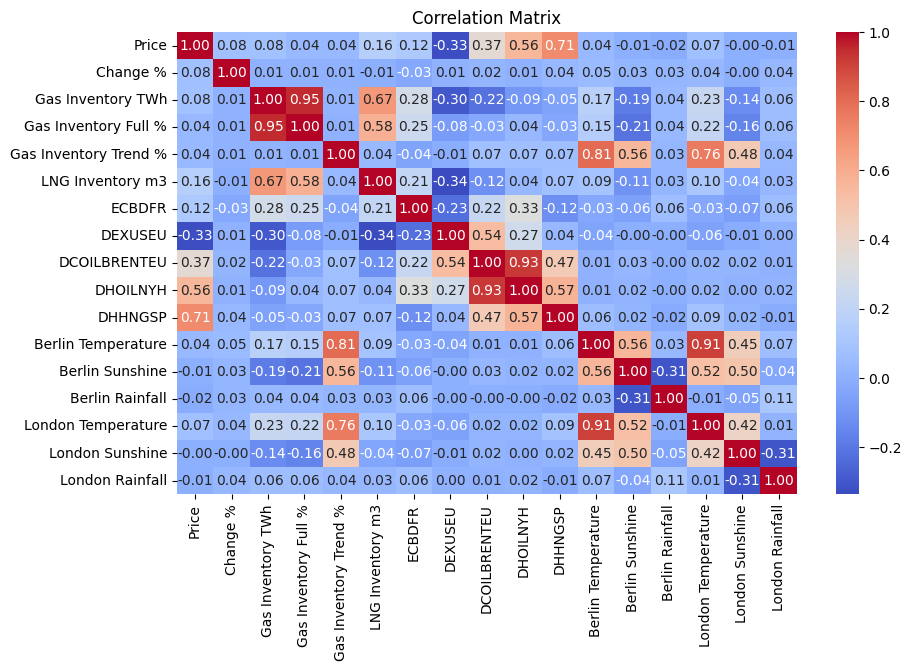

In [47]:
import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = data_normalized.corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

<br><br>
**CONDUCTING HILL CLIMB SEARCH AND FEATURE SELECTION**

In [ ]:
%%capture
# Create a HillClimbSearch object
hc = HillClimbSearch(data_normalized)

# Track scores over iterations
scores = []

# Set maximum number of iterations
max_iterations = 10

# Iterate
for i in range(max_iterations):
    # Search for the best DAG structure using BDeuScore as scoring method
    model = hc.estimate(scoring_method=BDeuScore(data_normalized))

    # Compute score
    score = BDeuScore(data_normalized).score(model)

    # Append score
    scores.append(score)

    # Check for convergence
    if i > 0 and abs(scores[-1] - scores[-2]) < 1e-1:
        print("Convergence reached")
        break


In [134]:
print("Bayesian Network Structure:")
print(model.edges())

Bayesian Network Structure:
[('Change %', 'Gas Inventory Full %'), ('Gas Inventory TWh', 'Gas Inventory Full %'), ('Gas Inventory Trend %', 'Berlin Temperature'), ('ECBDFR', 'Berlin Temperature'), ('DEXUSEU', 'Gas Inventory Full %'), ('DHHNGSP', 'Berlin Temperature'), ('Berlin Temperature', 'London Temperature'), ('Berlin Temperature', 'Gas Inventory TWh'), ('Berlin Temperature', 'LNG Inventory m3'), ('Berlin Temperature', 'London Sunshine'), ('Berlin Temperature', 'Gas Inventory Full %'), ('Berlin Temperature', 'Berlin Sunshine'), ('Berlin Temperature', 'Change %'), ('Berlin Temperature', 'Price'), ('Berlin Sunshine', 'Gas Inventory Full %'), ('Berlin Rainfall', 'Berlin Temperature'), ('London Temperature', 'DCOILBRENTEU'), ('London Temperature', 'DEXUSEU'), ('London Temperature', 'DHOILNYH'), ('London Rainfall', 'Berlin Temperature')]


<br><br>
**VISUALISATION OF DAG**

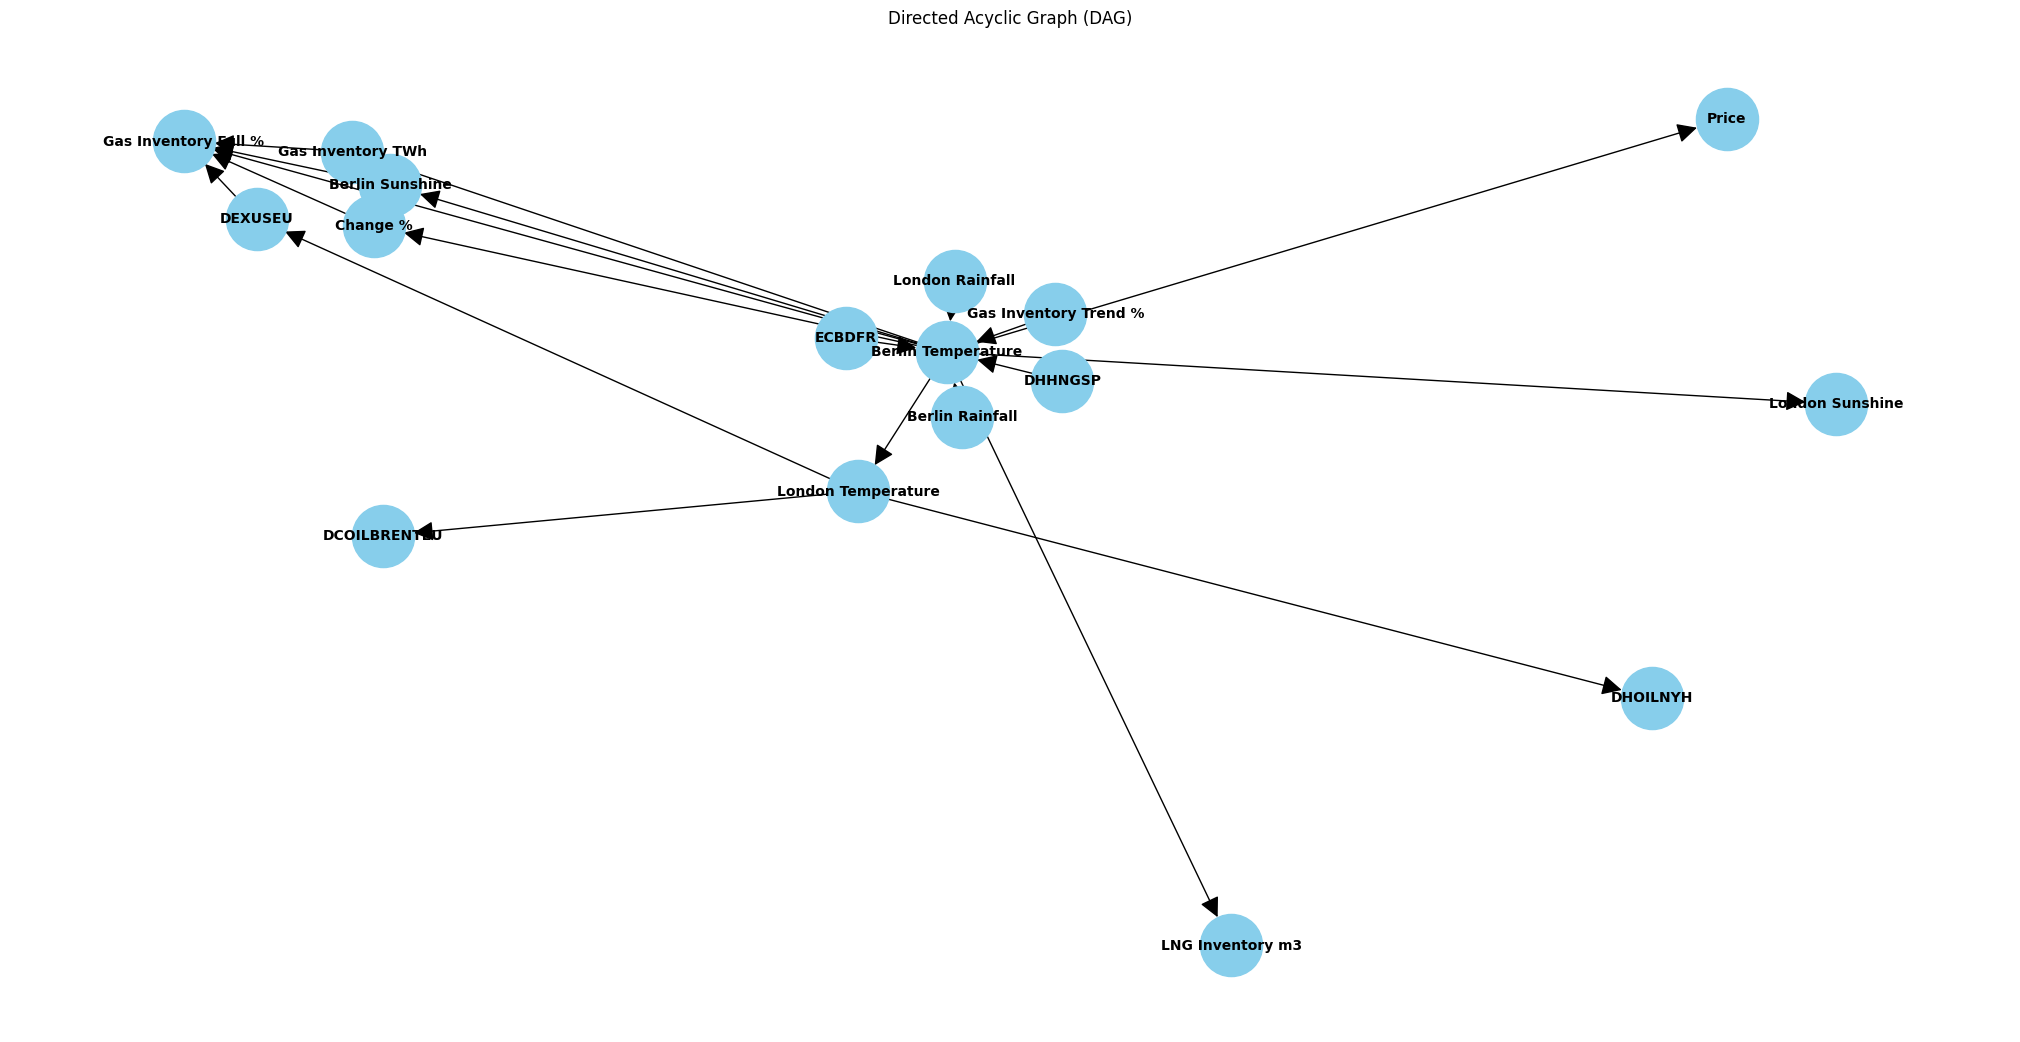

In [143]:
import matplotlib.pyplot as plt
import networkx as nx

# Create a directed graph from the DAG structure
dag = nx.DiGraph(model.edges())

# Plot the directed graph
plt.figure(figsize=(20, 10))
pos = nx.spring_layout(dag)  # Positions nodes using Fruchterman-Reingold force-directed algorithm
nx.draw(dag, pos, with_labels=True, node_size=2000, node_color="skyblue", font_size=10, font_weight="bold", arrowsize=30)
plt.title("Directed Acyclic Graph (DAG)")
plt.show()


<br><br>
**ADDITION OF TEST-TRAIN SPLIT AND FEATURE ELIMINATION**


In [180]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from pgmpy.estimators import HillClimbSearch, BDeuScore
import matplotlib.pyplot as plt
import networkx as nx

# Select relevant columns for analysis
columns_of_interest = ["Price", "Change %", "Gas Inventory TWh",
                       "Gas Inventory Full %", 'Gas Inventory Trend %', 'LNG Inventory m3',
                       'ECBDFR', 'DEXUSEU', 'DCOILBRENTEU',
                       'DHOILNYH', 'DHHNGSP', 'Berlin Temperature',
                       'Berlin Sunshine', 'Berlin Rainfall', 'London Temperature',
                       'London Sunshine', 'London Rainfall']

data = bayesian_network_dataframe[columns_of_interest]

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Normalize the selected columns
new_data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

# Split the data into training and testing sets
train_data, test_data = train_test_split(new_data, test_size=0.3, random_state=42)

# Calculate feature importances using RandomForestRegressor
reg = RandomForestRegressor()
reg.fit(train_data.drop("Change %", axis=1), train_data["Change %"])
importance_scores = reg.feature_importances_

# Define a threshold for feature importance
threshold = 0.05  # Example threshold value (adjust as needed)

# Create a boolean mask to identify important features based on the threshold
important_features_mask = importance_scores >= threshold

# Get the column names corresponding to important features
important_features = train_data.drop("Change %", axis=1).columns[important_features_mask]

# Filter the data to retain only important features
train_data_filtered = train_data[important_features]
test_data_filtered = test_data[important_features]

# Create a HillClimbSearch object with the filtered training data
hc = HillClimbSearch(train_data_filtered)

# Track scores over iterations
scores = []

# Set maximum number of iterations
max_iterations = 10

# Iterate
for i in range(max_iterations):
    # Search for the best DAG structure using BDeuScore as scoring method
    learned_model = hc.estimate(scoring_method=BDeuScore(train_data_filtered))

    # Compute score on test data for evaluation
    test_score = BDeuScore(test_data_filtered).score(learned_model)
    scores.append(test_score)

    # Check for convergence
    if i > 0 and abs(scores[-1] - scores[-2]) < 1e-8:
        print("Convergence reached")
        break


  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

Convergence reached


In [181]:
# Print Bayesian Network Structure learned from filtered training data
print("Bayesian Network Structure:")
print(learned_model.edges())

Bayesian Network Structure:
[('Gas Inventory Trend %', 'Berlin Temperature'), ('DEXUSEU', 'Berlin Temperature'), ('Berlin Temperature', 'London Temperature'), ('Berlin Temperature', 'LNG Inventory m3'), ('Berlin Temperature', 'London Sunshine'), ('Berlin Temperature', 'Price'), ('London Temperature', 'Berlin Sunshine'), ('London Temperature', 'DHOILNYH'), ('London Temperature', 'DHHNGSP'), ('London Rainfall', 'Berlin Temperature')]


<br><br>
**VISUALISATION OF DAG**

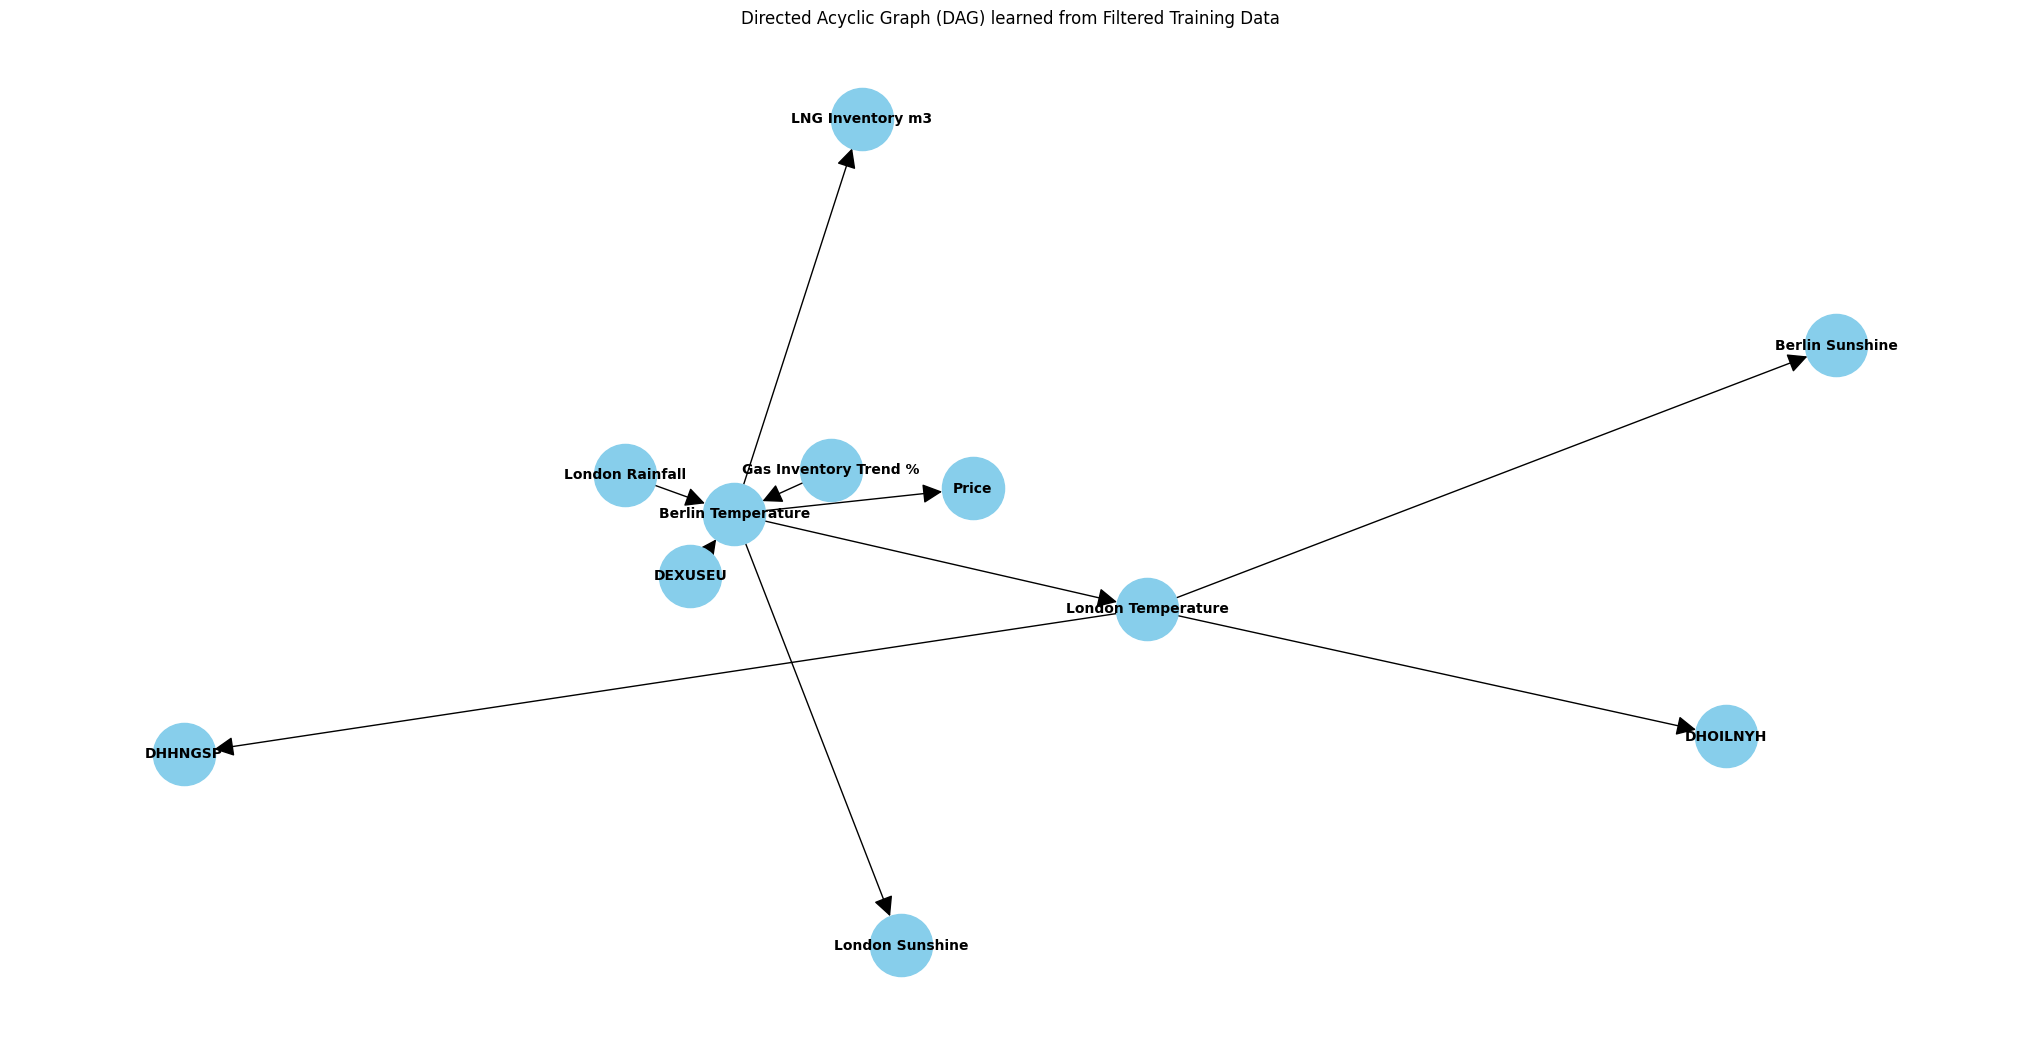

In [182]:

# Create a directed graph from the DAG structure
dag = nx.DiGraph(learned_model.edges())

# Define the node positions manually (adjust as needed)
pos = nx.spring_layout(dag, scale=1)

# Set the center node ('Price') position at the center of the plot
pos["Price"] = [0.1, 0.1]  # Place the "Price" node at the center (adjust coordinates as needed)

# Plot the directed graph with adjusted node positions
plt.figure(figsize=(20, 10))
nx.draw(dag, pos, with_labels=True, node_size=2000, node_color="skyblue", font_size=10, font_weight="bold", arrowsize=30)
plt.title("Directed Acyclic Graph (DAG) learned from Filtered Training Data")
plt.show()

References:


https://www.ecad.eu/dailydata/index.php

https://confluence.ecmwf.int/display/DAC/ECMWF+open+data%3A+real-time+forecasts+from+IFS+and+AIFS

https://www.dwd.de/EN/climate_environment/cdc/cdc_node_en.html

https://open-meteo.com/en/docs/historical-weather-api#latitude=51.5&longitude=10.5&start_date=2023-01-01&end_date=2024-01-01&hourly=&daily=temperature_2m_mean

